## Gaussian mixture model / Mezcla de Gaussianas
Apuntes curso Python para Machine Learning (2022), Francisco Pérez Galarce, Yesenia H. Salinas

En general los modelos de mezclas son modelos probabilísticos que buscan representar subpoblaciones dentro de una sola población, por ejemplo, nos gustaría tener un solo modelo que se ajuste a los diferentes segmentos de clientes que tiene una compañía. En particular, un modelo de mezcla de gaussianas es un modelo probabilístico que asume que todos los datos son generados desde un número finitos de distribuciones gaussianas con parámetros desconocidos. Este modelo puede ser interpretado como una versión probabilística de K-means, en comparación con K-means, en este modelo se otorga mayor flexibilidad a los clusters a partir de las matrices de covarianza y, además, cada objeto tiene una probabilidad de pertenencia a cada cluster (Gaussiana en este caso). 

### Modelo univariado

En modelo de mezcla de gaussianas unidimensional se representa de la siguiente forma: 

$p(x) = \sum_{k=1}^{K} \pi_{k}\mathcal{N}(x|\mu_{k}, \sigma_{k}^2) = \sum_{k=1}^{K} \pi_{k}\frac{1}{\sqrt{2\pi \sigma_{k}^{2}}} \exp^{-\frac{1}{2 \sigma_{k}^{2} } (x-\mu_k)^{2}}
$

Donde $K$ representa el número de gaussianas, $\mu_{k}$ representa el vector de medias,  $\sigma_{k}^2$ representa la varianza de cada gaussiana y $\pi_{k}$ representa la ponderación de cada gaussiana en el modelo. Para comprender la flexibilidad de este modelo y adquirir sensibilidad respecto al efecto de cada parámetro en el modelo, a continuación algunas mezclas de gaussianas son visualizadas: 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils 
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import multivariate_normal as mvn


**Caso** 1: se generan datos desde un mezcla de 4 gaussianas, cada una de ellas tiene una media diferente ($\mu_1= 0$, $\mu_2= 3$, $\mu_3= 6$ y $\mu_4= 9$), todas ellas tienen la misma varianza ($\sigma^2_1=\sigma^2_2=\sigma^2_3=\sigma^2_4=1$) y la ponderación de cada gaussiana es igual ($\pi_1=\pi_2=\pi_3=\pi_4=1$). 

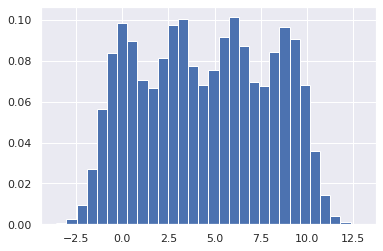

In [2]:
N = 50000
pi = [0.25, 0.25, 0.25, 0.25]
X1 = mvn.rvs(mean=[0], cov=[1], size=int(pi[0]*N))
X2 =mvn.rvs(mean=[3], cov=[1], size=int(pi[1]*N))
X3 =mvn.rvs(mean=[6], cov=[1], size=int(pi[2]*N))
X4 =mvn.rvs(mean=[9], cov=[1], size=int(pi[3]*N))
X = np.concatenate((X1, X2, X3, X4))
plt.hist(X, bins=30, density=True)
plt.show()

A partir de la gráfica podemos apreciar claramente las cuatro subpoblaciones (Gaussianas), siendo para este caso particular todas similares en términos del peak de la distribución y de la varianza. A continuación se visualizará cada una de estas cuatro gaussianas por separado. 

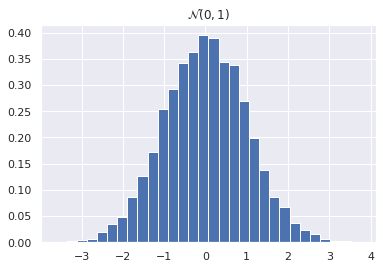

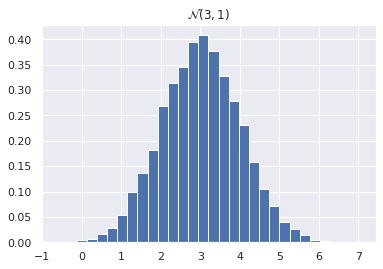

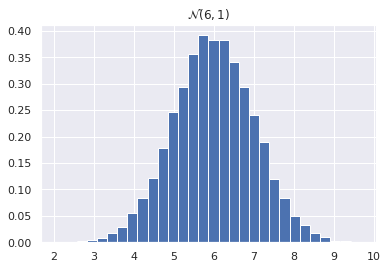

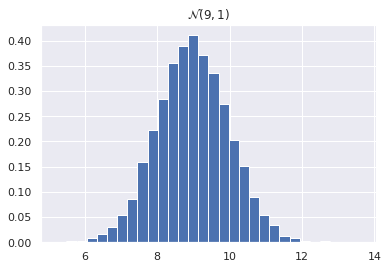

In [3]:
N = 50000
X1 = mvn.rvs(mean=[0], cov=[1], size=int(pi[0]*N))
plt.hist(X1, bins=30, density=True)
plt.title('$\mathcal{N}(0, 1)$')
plt.show()
X2 =mvn.rvs(mean=[3], cov=[1], size=int(pi[1]*N))
plt.hist(X2, bins=30, density=True)
plt.title('$\mathcal{N}(3, 1)$')
plt.show()

X3 =mvn.rvs(mean=[6], cov=[1], size=int(pi[2]*N))
plt.hist(X3, bins=30, density=True)
plt.title('$\mathcal{N}(6, 1)$')
plt.show()

X4 =mvn.rvs(mean=[9], cov=[1], size=int(pi[3]*N))
plt.hist(X4, bins=30, density=True)
plt.title('$\mathcal{N}(9, 1)$')
plt.show()

**Caso 2**: se generan datos desde una mezcla de 4 gaussianas, cada una de ellas tiene una media diferente (0, 3, 6 y 9), todas ellas tienen la misma varianza (1) pero la ponderación de cada gaussiana es diferente, siendo la gaussiana de media 0 la que tiene mayor ponderación (0.7), las tres restantes tienen ponderación 0.1. 

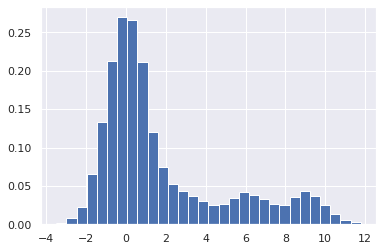

In [4]:
N = 10000
pi = [0.7, 0.1, 0.1, 0.1]
X1 = mvn.rvs(mean=[0], cov=[1], size=int(pi[0]*N))
X2 =mvn.rvs(mean=[3], cov=[1], size=int(pi[1]*N))
X3 =mvn.rvs(mean=[6], cov=[1], size=int(pi[2]*N))
X4 =mvn.rvs(mean=[9], cov=[1], size=int(pi[3]*N))
X = np.concatenate((X1, X2, X3, X4))
plt.hist(X, bins=30, density=True)
plt.show()

**Caso 3:**se generan datos desde un mezcla de 4 gaussianas, cada una de ellas tiene una media diferente (0, 3, 6 y 9), tanto las ponderaciones de las gaussianas como las varianzas son diferentes. Siendo las gaussianas 1 y 4 las que tienen mayor importacia (0.4), pero la gaussiana 1 tiene un varianza mucho menor que la 4.  

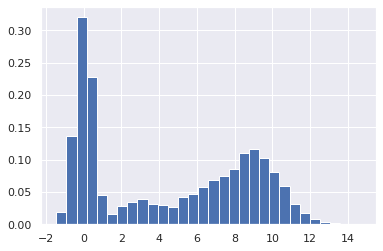

In [5]:
N = 10000
pi = [0.4, 0.1, 0.1, 0.4]
X1 = mvn.rvs(mean=[0], cov=[0.2], size=int(pi[0]*N))
X2 =mvn.rvs(mean=[3], cov=[1], size=int(pi[1]*N))
X3 =mvn.rvs(mean=[6], cov=[1], size=int(pi[2]*N))
X4 =mvn.rvs(mean=[9], cov=[2], size=int(pi[3]*N))
X = np.concatenate((X1, X2, X3, X4))
plt.hist(X, bins=30, density=True)
plt.show()

### Modelo multivariado

De esta misma forma, la versión multidimensional del modelo es: 

$p(x) = \sum_{k=1}^{K} \pi_{k}\mathcal{N}(\mathbf{x}|\mathbf{\mu_{k}}, \mathbf{\Sigma_{k}}) = \sum_{k=1}^{K} \pi_{k}\frac{1}{\left(2 \pi \right)^{D/2} |\mathbf{ \Sigma_k}|^{1/2}} \exp \left[ -\frac{1}{2} \left( \mathbf{x - \mu_k} \right)^{T} \mathbf{\Sigma_k}^{-1} \left( \mathbf{x - \mu_k} \right) \right]$

Donde $K$ representa el número de gaussianas, $\mathbf{\mu}_{k}$ representa el vector de medias de la gaussiana $k$,  $\mathbf{\Sigma}_{k}$ representa la matriz de covarianza de la gaussiana $k$ y $\pi_{k}$ representa la ponderación de la gaussiana $k$ de cada gaussiana en el modelo. Para comprender el efecto de cada parámetro en el modelo, a continuación algunas mezclas de gaussianas son visualizadas: 

**Caso 1:** se generan datos desde un mezcla de 4 gaussianas en dos dimensiones, cada una de ellas tiene un vector de medias diferente, 

$\mu_1 = [0, 0],  \mu_2 = [0, 6],  \mu_3 = [6, 0], \mu_4 = [6, 6]$.

Todas ellas tienen la misma varianza matriz de covarianza, 

$\Sigma$ = [[1, 0], [0, 1]], una matriz diagonal esférica. 

Finalmente, la ponderación de cada gaussiana es igual a 0.25. 

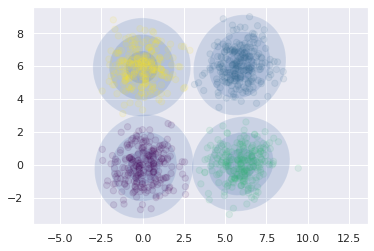

In [6]:
N = 1000
pi = [0.25, 0.25, 0.25, 0.25]
X1 = mvn.rvs(mean=[0, 0], cov=[[1,0],[0,1]], size=int(pi[0]*N))
X2 =mvn.rvs(mean=[0, 6], cov=[[1,0],[0,1]], size=int(pi[1]*N))
X3 =mvn.rvs(mean=[6, 0], cov=[[1,0],[0,1]], size=int(pi[2]*N))
X4 =mvn.rvs(mean=[6, 6], cov=[[1,0],[0,1]], size=int(pi[3]*N))
X = np.concatenate((X1, X2, X3, X4))
gmm = GMM(n_components=4, random_state=42)
utils.plot_gmm(gmm, X)

In [7]:
X

array([[-0.26733354, -0.63255522],
       [ 0.80873548, -1.00895116],
       [ 0.07826847,  0.87457687],
       ...,
       [ 5.17911051,  5.01074669],
       [ 5.65106491,  5.84400718],
       [ 6.43226918,  5.89029876]])

**Caso 2:** se generan datos desde una mezcla de 4 gaussianas en dos dimensiones, cada una de ellas tiene un vector de medias diferente, 

$\mu_1 = [0, 0],  \mu_2 = [0, 6],  \mu_3 = [6, 0], \mu_4 = [6, 6]$.

Todas ellas tienen la misma varianza matriz de covarianza, 

$\Sigma$ = [[1, 0], [0, 1]], una matriz diagonal isotrópica. 

Finalmente, la ponderación de una de las gaussianas es 0.7 y la ponderación de las restantes 0.1. 

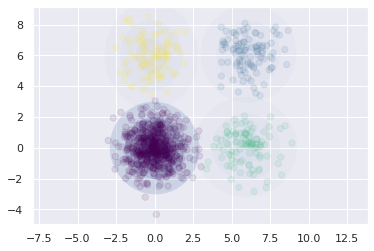

In [8]:
N = 1000
pi = [0.7, 0.1, 0.1, 0.1]
X1 = mvn.rvs(mean=[0, 0], cov=[[1,0],[0,1]], size=int(pi[0]*N))
X2 =mvn.rvs(mean=[0, 6], cov=[[1,0],[0,1]], size=int(pi[1]*N))
X3 =mvn.rvs(mean=[6, 0], cov=[[1,0],[0,1]], size=int(pi[2]*N))
X4 =mvn.rvs(mean=[6, 6], cov=[[1,0],[0,1]], size=int(pi[3]*N))
X = np.concatenate((X1, X2, X3, X4))
gmm = GMM(n_components=4, random_state=42)
utils.plot_gmm(gmm, X)

**Caso 3:** se generan datos desde un mezcla de 4 gaussianas en dos dimensiones, cada una de ellas tiene un vector de medias diferente, 

$\mu_1 = [0, 0],  \mu_2 = [0, 6],  \mu_3 = [6, 0], \mu_4 = [6, 6]$.

Las matriz de covarianza de la gaussiana 1 es diferente, 
$\Sigma_1$ = [[3, 1.5], [1.5, 1.5]], 

Las restantes tres tienen la misma matriz de covarianza. 

$\Sigma$ = [[1, 0], [0, 1]], una matriz diagonal isotrópica. 

Finalmente, la ponderación de las dos primeras es 0.4 y la ponderación de las dos últimas es 0.1. 

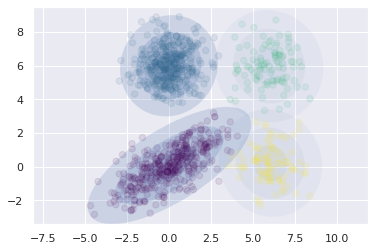

In [9]:
N = 1000
pi = [0.4, 0.4, 0.1, 0.1]
X1 = mvn.rvs(mean=[0, 0], cov=[[3,1.5],[1.5,1.5]], size=int(pi[0]*N))
X2 =mvn.rvs(mean=[0, 6], cov=[[1,0],[0,1]], size=int(pi[1]*N))
X3 =mvn.rvs(mean=[6, 0], cov=[[1,0],[0,1]], size=int(pi[2]*N))
X4 =mvn.rvs(mean=[6, 6], cov=[[1,0],[0,1]], size=int(pi[3]*N))
X = np.concatenate((X1, X2, X3, X4))
gmm = GMM(n_components=4, random_state=42)
utils.plot_gmm(gmm, X)

**Caso 4:** se generan datos de una mezcla de 4 gaussianas en dos dimensiones, cada una de ellas tiene un vector de medias diferente, 

$\mu_1 = [0, 0],  \mu_2 = [0, 6],  \mu_3 = [6, 0], \mu_4 = [6, 6]$.

Las matrices de covarianza de las dos primeras gaussianas son diferentes, 

$\Sigma_1$ = [[3, 1.5], [1.5, 1.5]], $\Sigma_2$ = [[2, -1.5], [-1.5, 2]] 

Las restantes dos tienen la misma matriz de covarianza. 

$\Sigma$ = [[1, 0], [0, 1]], una matriz diagonal isotrópica. 

Finalmente, la ponderación de las dos primeras es 0.4 y la ponderación de las dos últimas es 0.1. 

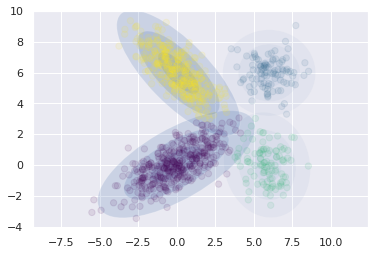

In [10]:
N = 1000
pi = [0.4, 0.4, 0.1, 0.1]
X1 = mvn.rvs(mean=[0, 0], cov=[[3,1.5],[1.5,1.5]], size=int(pi[0]*N))
X2 =mvn.rvs(mean=[0, 6], cov=[[2,-1.5],[-1.5,2]], size=int(pi[1]*N))
X3 =mvn.rvs(mean=[6, 0], cov=[[1,0],[0,1]], size=int(pi[2]*N))
X4 =mvn.rvs(mean=[6, 6], cov=[[1,0],[0,1]], size=int(pi[3]*N))
X = np.concatenate((X1, X2, X3, X4))
gmm = GMM(n_components=4, random_state=42)
utils.plot_gmm(gmm, X)

### Usos de la mezcla de gaussianas
**Clustering:** La aplicación directa de este modelo considera como input un conjunto de descriptores sin una etiqueta, luego el modelo ajusta un número dado de gaussianas, encontrando las medias y matrices de covarianza de cada subpoblación. Todas las aplicaciones de clustering vistas en el curso tales como segmentación de clientes or clustering de imágenes podrían ser trabajadas aplicado este modelo (en sklearn *GaussianMixture*).  

**Detección de anomalías:** Cuando un dato tiene baja probabilidad de pertenencia a todas las gaussianas ajustadas se puede inferir que es un dato distinto a las subpoblaciones, por lo tanto, puede ser un dato anómalos de interés. Por ejemplo, para detectar comportamiento fraudulento en transacciones financieras. 

**Clasificación:** Con algunas adpataciones este modelo puede ser aplicado en contextos de clasificación. Se puede inicializar los vectores de medias de las gaussianas a los valores de las medias obtenidos desde los datos, 

### Algoritmo para encontrar parámetros
En general para estimar párametros en distribuciones de probabilidad se aplican métodos como el método de la máxima verosimilitud o el método de los momentos. Sin embargo, en los modelos de mezclas existen interacciones o variables no observadas (variables latentes), por lo tanto no podemos aplicar estos métodos directamente. Notar que las variables no observadas en las mezclas de distribuciones corresponen a la asignación de cada dato a la distribución correspondiente. 

Dada esta dificultad, para poder encontrar los parámetros de cada distribución dentro de la mezcla se aplica un procedimiento de dos fases llamado Expectation-Maximization.

**Paso 0:** Inicializar parámetros de cada distribución. 

**E-Step:** Estimar el valor esperado para cada variable latente.

**M-Step:** Optimiza los parámetros de cada distribución usando máxima verosimilitud. 


### Cálculo de medias y covarianza
En una cotexto de aprendizaje no supervisado, nos vemos enfrentados a una base de datos sin saber su proceso generador, a diferencia de los ejemplos anteriores donde explicitamente sabemos la gaussiana que generó cada dato.
Asumamos que tenemos la siguiente base de datos

In [11]:
X

array([[ 0.1560553 , -0.05436849],
       [ 0.05905049, -0.84069628],
       [-2.17768449, -0.84360491],
       ...,
       [ 6.95825691,  5.38728581],
       [ 6.88258682,  6.84178437],
       [ 5.19395134,  5.59031172]])

Esta base de datos contiene dos dimensiones, en tanto ajustaremos una mezcla de gaussianas bidimensional. La primera pregunta que nos surge es *¿Cuántas gaussianas debo ajustar?*
Para determinar el número de gaussianas adecuadas usaremos como indicadores de ajuste el AIC (Akaike’s Information Criteria) y BIC (Bayesian Information Criteria). Ambas métricas consideran ajuste del modelo y penalización por parámetros. 

Como podemos observar desde la gráfica (abajo), el valor mínimo se obtiene en 4 componentes,  a partir de ese punto  ambos criterios comienzan a aumentar en su valor.  

In [12]:
n_componentes = np.arange(1,10)
modelos = [GMM(n, covariance_type = 'full', random_state = 0).fit(X)
           for n in n_componentes]

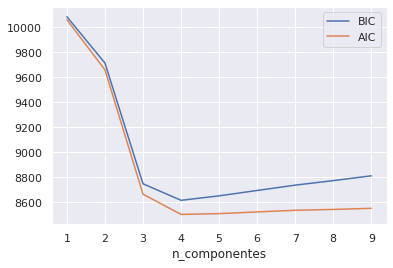

In [13]:
plt.plot(n_componentes, [m.bic(X) for m in modelos], label = 'BIC')
plt.plot(n_componentes, [m.aic(X) for m in modelos], label = 'AIC')
plt.legend(loc='best')
plt.xlabel('n_componentes')
plt.show()

Ahora ajustamos el modelo con las 4 componentes y lo visualizamos. 

In [14]:
gmm = GMM(4, covariance_type = 'full', random_state = 0).fit(X)

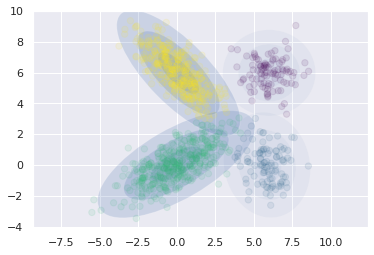

In [15]:
utils.plot_gmm(gmm, X)

Finalmente, imprimimos las medias y la matriz de covarianza de cada gaussiana.

In [16]:

centers = np.zeros(shape=(gmm.n_components, X.shape[1]))

for i in range(gmm.n_components):
    
    density = mvn(cov = gmm.covariances_[i], mean = gmm.means_[i]).pdf(X)
    print('---------------------')
    print('Gaussiana '+str(i))
    print('Medias')
    print(gmm.means_[i])
    print('Covarianza')
    print(gmm.covariances_[i])


---------------------
Gaussiana 0
Medias
[6.00832995 5.98899058]
Covarianza
[[ 1.0084701  -0.00132617]
 [-0.00132617  0.86946722]]
---------------------
Gaussiana 1
Medias
[5.86947284e+00 4.92560750e-03]
Covarianza
[[ 0.87984689 -0.09511284]
 [-0.09511284  1.30067036]]
---------------------
Gaussiana 2
Medias
[-0.0268733   0.05214552]
Covarianza
[[2.91012048 1.34579945]
 [1.34579945 1.35084177]]
---------------------
Gaussiana 3
Medias
[0.11813511 5.97682988]
Covarianza
[[ 1.79390141 -1.37434447]
 [-1.37434447  1.85995046]]


### Referencias

- Bishop, C. M., & Nasrabadi, N. M. (2006). Mixture Models and EM in Pattern recognition and machine learning (Vol. 4, No. 4, p. 738). New York: springer.

- https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4